In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib

matplotlib.rcParams.update({'font.size': 15})
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', titlesize=20) 
matplotlib.rc('axes', labelsize=15)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
base_path = 'D:/Downloads/holmusk/'

#### bill amount

In [3]:
bill_amount = pd.read_csv(base_path + 'bill_amount.csv')

In [4]:
bill_amount.shape

(13600, 2)

In [5]:
# distribution of bills amount is very right skewed

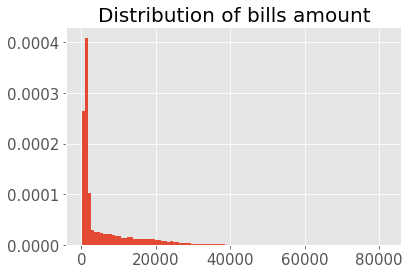

In [6]:
bill_amount['amount'].hist(bins = 100, normed = True)
plt.title('Distribution of bills amount', fontsize = 20)
plt.show()

#### bill id

In [7]:
bill_id = pd.read_csv(base_path + 'bill_id.csv')

In [8]:
bill_id.shape[0]

13600

In [9]:
bill_id.head(5)

,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01


In [10]:
# bills data comes with similar regularity over dates

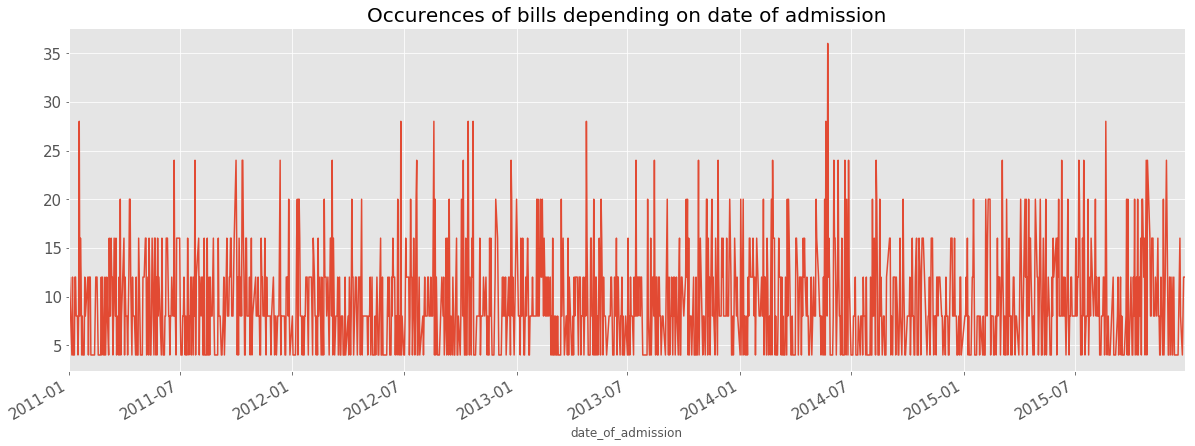

In [11]:
bill_id['date_of_admission'] = pd.to_datetime(bill_id['date_of_admission'], format = '%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,7))
bill_id.groupby('date_of_admission')['bill_id'].count().plot(kind='line', ax = ax)
plt.title('Occurences of bills depending on date of admission', fontsize = 20)
plt.show()

#### demographics

In [12]:
demo = pd.read_csv(base_path + 'demographics.csv')

In [13]:
demo.shape[0]

3000

In [14]:
demo.head(5)

,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12


In [15]:
# gender ration seems equal

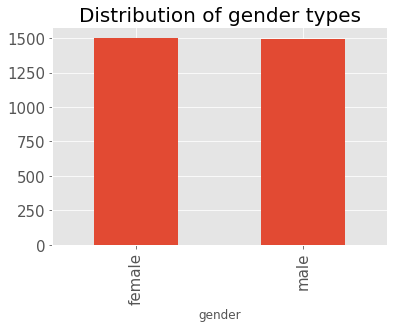

In [16]:
demo['gender'] = demo['gender'].map(lambda x: 'male' if 'f' in x.lower() else 'female')
demo.groupby('gender')['patient_id'].count().plot(kind = 'bar')
plt.title('Distribution of gender types', fontsize = 20)
plt.axis(fontsize = 10)
plt.show()

In [17]:
# most of the patients are chinese

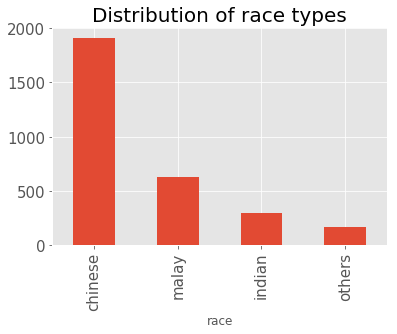

In [18]:
demo['race'] = demo['race'].map(lambda x: 'chinese' if 'chine' in x.lower() else 'malay' if 'malay' in x.lower() else
                               'indian' if 'india' in x.lower() else 'others'
                               )
demo.groupby('race')['patient_id'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Distribution of race types', fontsize = 20)
plt.show()

In [19]:
# most of the patients are singaporeans

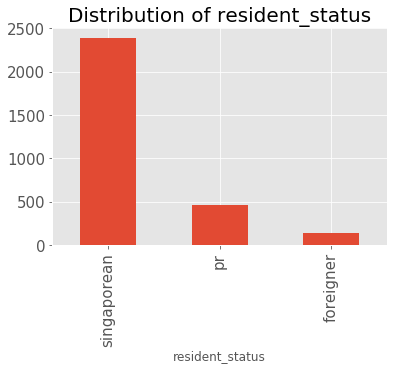

In [20]:
demo['resident_status'] = demo['resident_status'].map(lambda x: 'singaporean' if 'singap' in x.lower() else 'pr' if 'pr' in x.lower() else
                               'foreigner')
demo.groupby('resident_status')['patient_id'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Distribution of resident_status', fontsize = 20)
plt.show()

In [21]:
# make feature binarization

In [22]:
demo['singaporean'] = demo['resident_status'].map(lambda x: 1 if 'singap' in x.lower() else 0)
demo['pr'] = demo['resident_status'].map(lambda x: 1 if 'pr' in x.lower() else 0)

demo['gender'] = demo['gender'].map(lambda x: 1 if 'f' not in x.lower() else 0) 

demo['indian'] = demo['race'].map(lambda x: 1 if 'indian' in x.lower() else 0)
demo['chinese'] = demo['race'].map(lambda x: 1 if 'chin' in x.lower() else 0)
demo['malay'] = demo['race'].map(lambda x: 1 if 'malay' in x.lower() else 0)
demo.drop('race', axis = 1, inplace = True)

In [23]:
# let's look at the clients age distribution

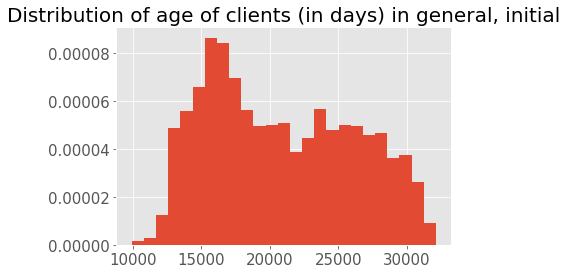

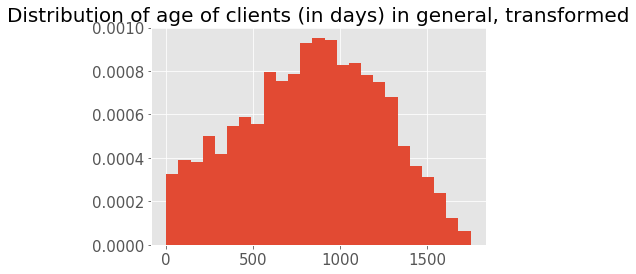

In [24]:
demo['date_of_birth'] = pd.to_datetime(demo['date_of_birth'], format = '%Y-%m-%d')

demo['current_age'] = pd.to_datetime('today') -  demo['date_of_birth']
demo['current_age'] = demo['current_age'].map(lambda x: x.days)

plt.title('Distribution of age of clients (in days) in general, initial', fontsize = 20)
demo['current_age'].hist(bins = 25, normed = True)
plt.show()

plt.title('Distribution of age of clients (in days) in general, transformed', fontsize = 20)
(abs(demo['current_age'] - demo['current_age'].mean())**0.8).hist(bins = 25, normed = True)

plt.show()

In [25]:
demo.drop(['resident_status'], axis = 1, inplace = True)

#### clinical data

In [26]:
clinic = pd.read_csv(base_path + 'clinical_data.csv')

In [27]:
clinic.shape[0]

3400

In [28]:
clinic[['id', 'date_of_admission']].shape[0]

3400

In [29]:
clinic.head(5)

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,...,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,...,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


In [30]:
# on-the-go we generate feature STAY_TIME - it's a number of days that patient spent at the clinic

In [31]:
clinic['date_of_admission'] = pd.to_datetime(clinic['date_of_admission'], format = '%Y-%m-%d')
clinic['date_of_discharge'] = pd.to_datetime(clinic['date_of_discharge'], format = '%Y-%m-%d')

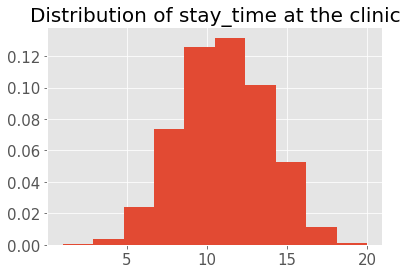

In [32]:
clinic['stay_time'] = clinic['date_of_discharge'] -  clinic['date_of_admission']
clinic['stay_time'] = clinic['stay_time'].map(lambda x: x.days)

clinic['stay_time'].hist(bins = 10, normed = True)
plt.title('Distribution of stay_time at the clinic', fontsize = 20)

plt.show()

In [33]:
# look at the weight distribution

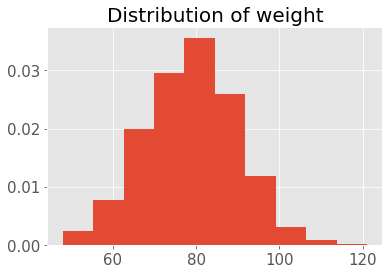

In [34]:
clinic['weight'].hist(bins = 10, normed = True)
plt.title('Distribution of weight', fontsize = 20)

plt.show()

In [35]:
# look at the height distribution

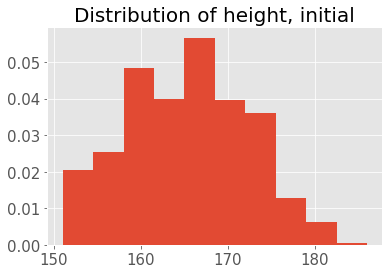

In [36]:
clinic['height'].hist(bins = 10, normed = True)
plt.title('Distribution of height, initial', fontsize = 20)
plt.show()

# np.log(clinic['height']).hist(bins = 10, normed = True)
# plt.title('Distribution of height, log-transfromed', fontsize = 20)
# plt.show()

In [37]:
# generate a mass index feature (kilogramms of weight on one santimeter of height) and look at the distribution

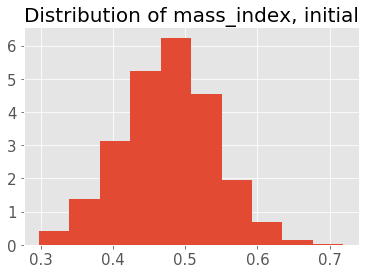

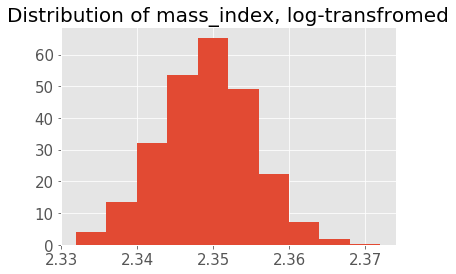

In [38]:
clinic['mass_index'] = clinic['weight'] / clinic['height']

plt.title('Distribution of mass_index, initial', fontsize = 20)
clinic['mass_index'].hist(bins = 10, normed = True)
plt.show()

plt.title('Distribution of mass_index, log-transfromed', fontsize = 20)
np.log(clinic['mass_index'] + 10).hist(bins = 10, normed = True)
plt.show()

In [39]:
# check missing values and fill them out with 0

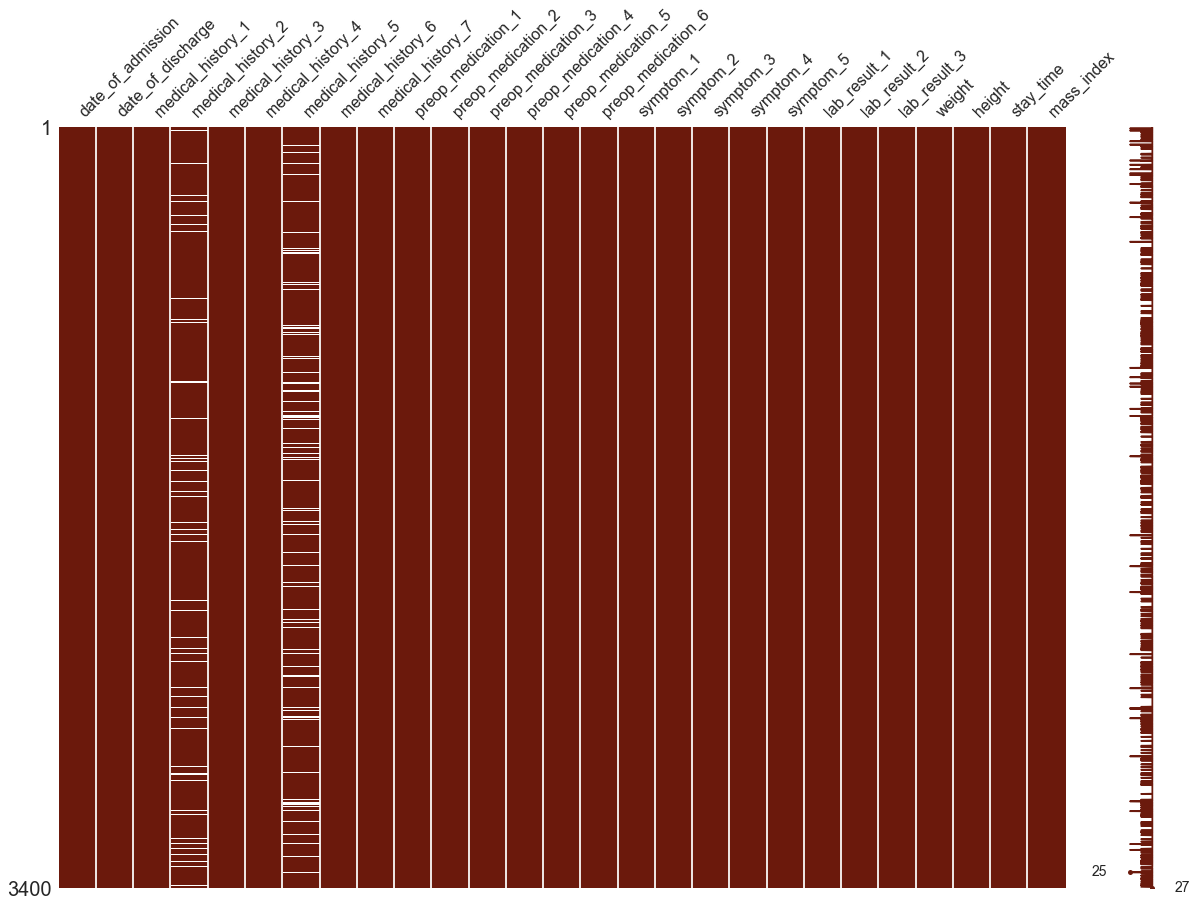

In [40]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=clinic.iloc[:,1:], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [41]:
clinic.fillna(0, inplace = True)

In [42]:
# binarize features

In [43]:
for c in clinic.columns:
    if 'history' in c or 'medication' in c or 'symptom' in c:
        clinic[c] = clinic[c].map(lambda x: x if str(x).lower() not in ['yes', 'no']
                                 else 1 if str(x).lower() == 'yes' else 0
                                 )
        clinic[c] = clinic[c].astype(int)

#### check distribution of binary featuries

In [44]:
# med histories

In [45]:
plt.style.use('ggplot')

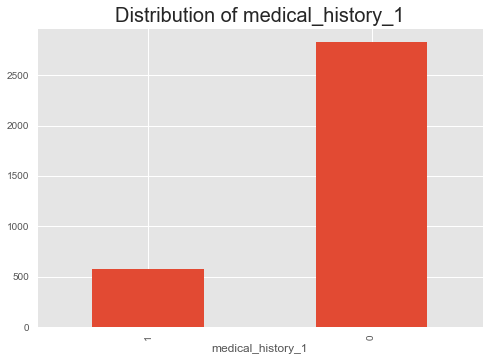

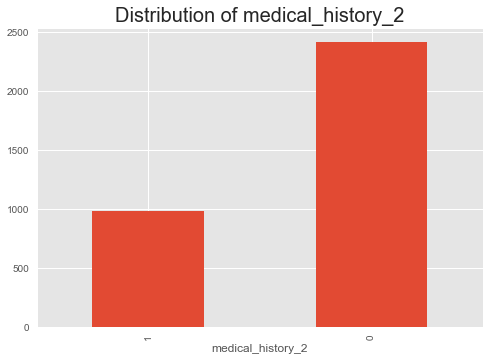

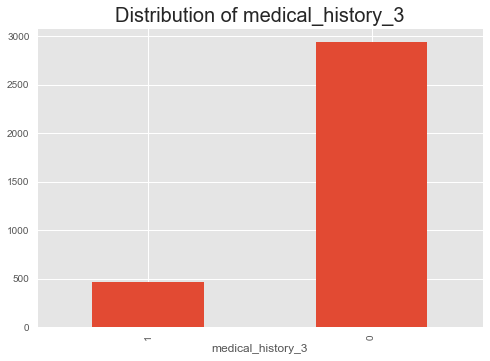

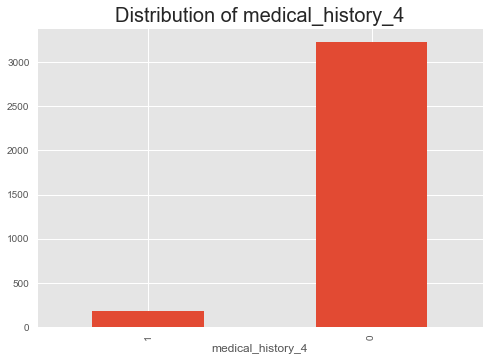

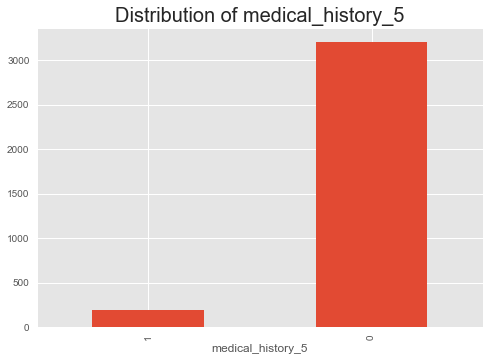

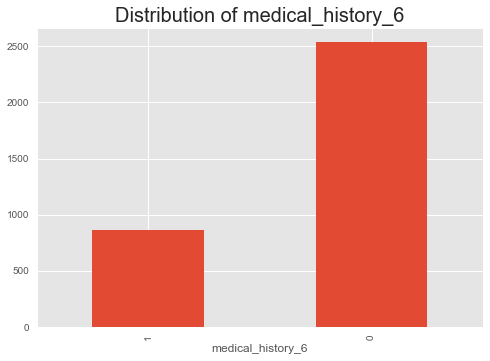

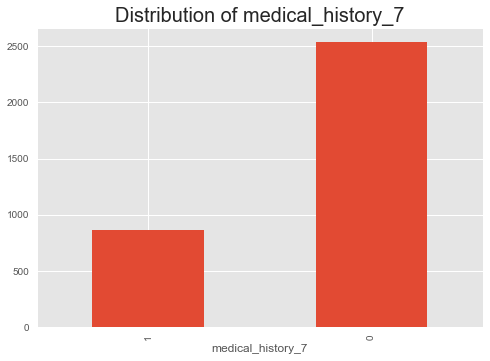

In [46]:
cols = [c for c in clinic.columns if 'history' in c]
for c in cols:
    clinic.groupby(c)['id'].count().sort_values(ascending = True).plot(kind = 'bar')
    plt.title('Distribution of %s' %c, fontsize = 20)
    plt.show()

In [47]:
# preop medication

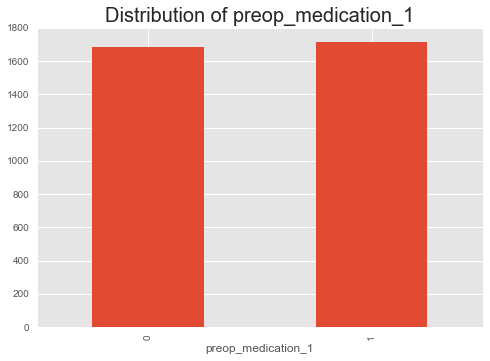

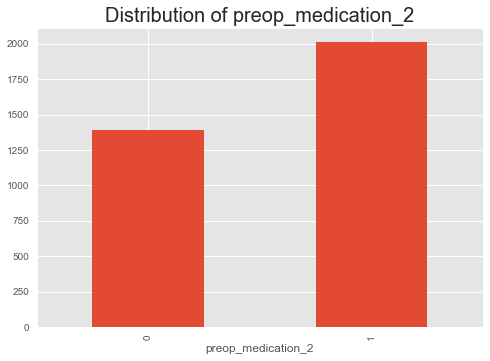

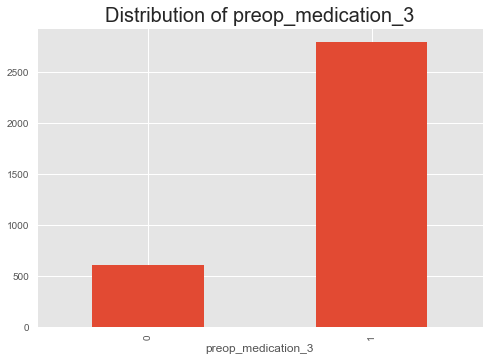

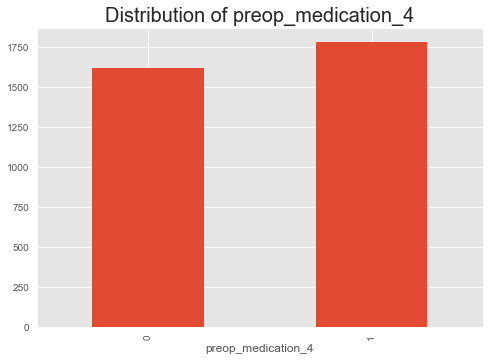

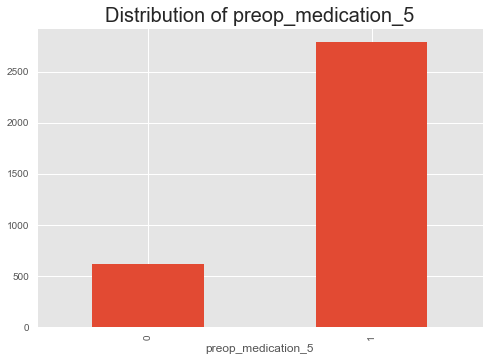

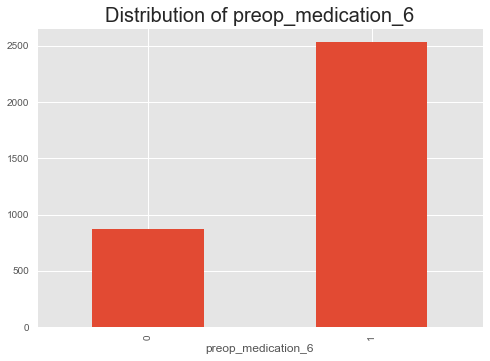

In [48]:
cols = [c for c in clinic.columns if 'preop' in c]
for c in cols:
    clinic.groupby(c)['id'].count().sort_values(ascending = True).plot(kind = 'bar')
    plt.title('Distribution of %s' %c, fontsize = 20)
    plt.show()

In [49]:
# symptoms

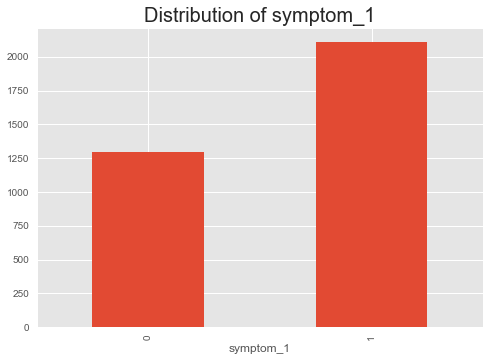

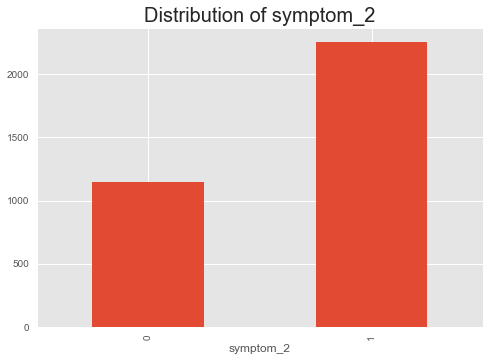

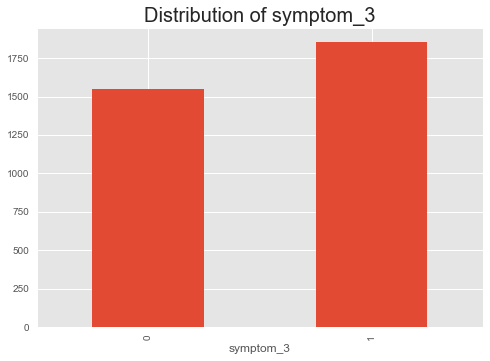

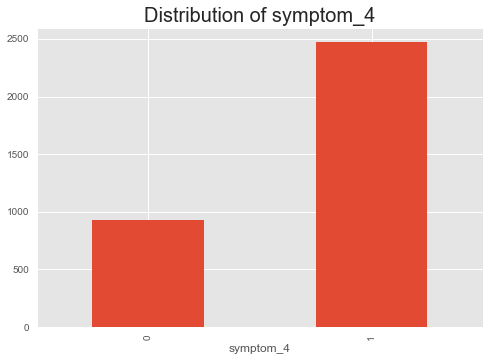

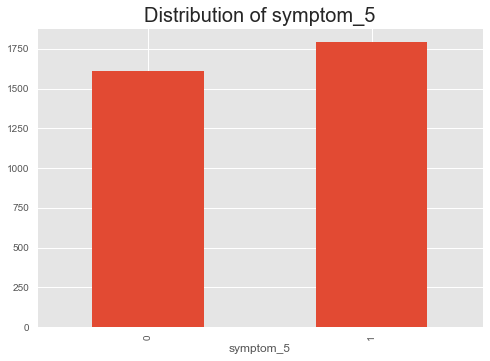

In [50]:
cols = [c for c in clinic.columns if 'symptom' in c]
for c in cols:
    clinic.groupby(c)['id'].count().sort_values(ascending = True).plot(kind = 'bar')
    plt.title('Distribution of %s' %c, fontsize = 20)
    plt.show()

In [51]:
# no correlation among these binary features

In [52]:
import plotly.offline as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)

cols = [c for c in clinic.columns if 'history' in c or 'preop' in c or 'symptom' in c and clinic[c].dtype != 'object']
data = [
    go.Heatmap(
        z= clinic[cols].corr(method = 'kendall').values,
        x=clinic[cols].columns.values,
        y=clinic[cols].columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [53]:
# check distribution of lab results => they look normal

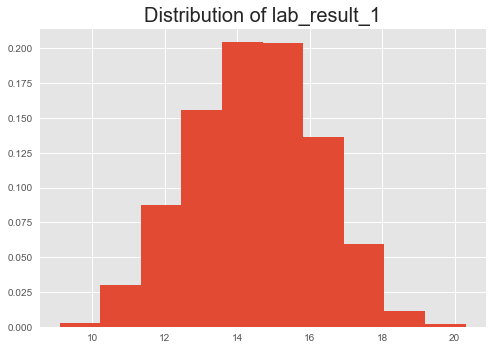

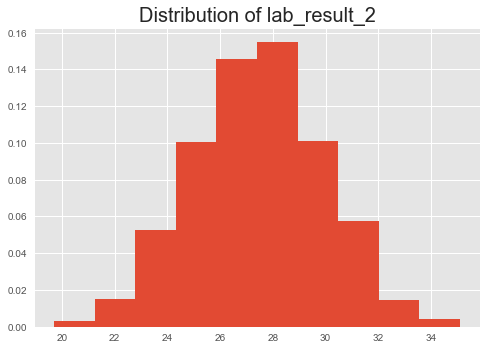

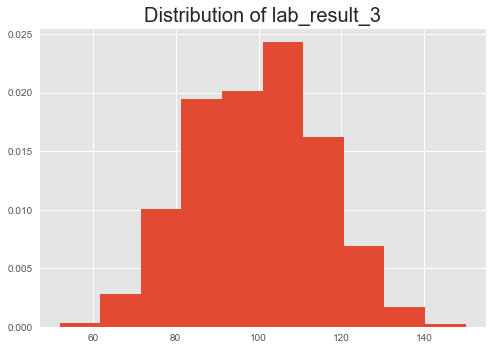

In [54]:
for c in ['lab_result_1', 'lab_result_2', 'lab_result_3']:
    clinic[c].hist(bins = 10, normed = True)
    plt.title('Distribution of %s' %c, fontsize = 20)
    plt.show()

#### start agregating data

In [55]:
clinic_demo = pd.merge(clinic, demo, how = 'left', left_on = 'id', right_on = 'patient_id')
clinic_demo_bill = pd.merge(clinic_demo, bill_id, how = 'left', left_on = ['patient_id', 'date_of_admission'],
                            right_on = ['patient_id', 'date_of_admission'])
clinic_demo_bill = pd.merge(clinic_demo_bill, bill_amount, how = 'left', left_on = 'bill_id', right_on = 'bill_id')

In [56]:
clinic_demo_bill.shape[0], clinic.shape[0]

(13600, 3400)

In [57]:
clinic_demo_bill.columns

Index(['id', 'date_of_admission', 'date_of_discharge', 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height',
       'stay_time', 'mass_index', 'patient_id', 'gender', 'date_of_birth',
       'singaporean', 'pr', 'indian', 'chinese', 'malay', 'current_age',
       'bill_id', 'amount'],
      dtype='object')

In [58]:
agg_cols = ['id', 'date_of_admission', 'date_of_discharge', 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height', 'stay_time', 'mass_index',
       'patient_id', 'gender', 'indian', 'chinese', 'malay', 'singaporean', 'pr','date_of_birth']

clinic_demo_bill = clinic_demo_bill.fillna(0).groupby(agg_cols)['amount'].sum().reset_index()

In [59]:
clinic_demo_bill['age_when_admission'] = clinic_demo_bill['date_of_admission'] - clinic_demo_bill['date_of_birth']

clinic_demo_bill['age_when_admission'] = clinic_demo_bill['age_when_admission'].map(lambda x: x.days)

In [60]:
# check distribution of bills amount

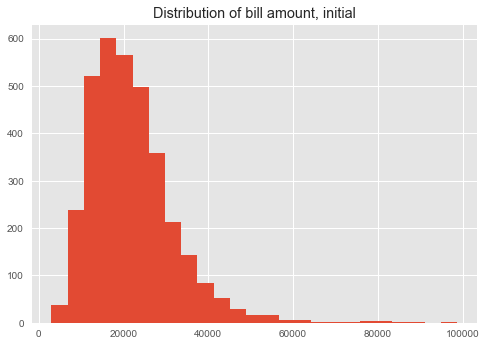

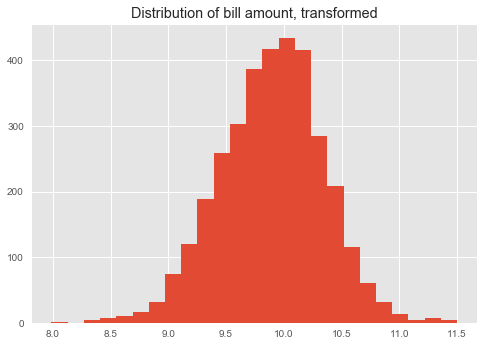

In [61]:
clinic_demo_bill['amount'].hist(bins = 25)
plt.title('Distribution of bill amount, initial')
plt.show()

np.log(clinic_demo_bill['amount']).hist(bins = 25)
plt.title('Distribution of bill amount, transformed')
plt.show()

In [62]:
clinic_demo_bill['amount'] = np.log(clinic_demo_bill['amount'])

In [63]:
# check the distribution of age_when_admission

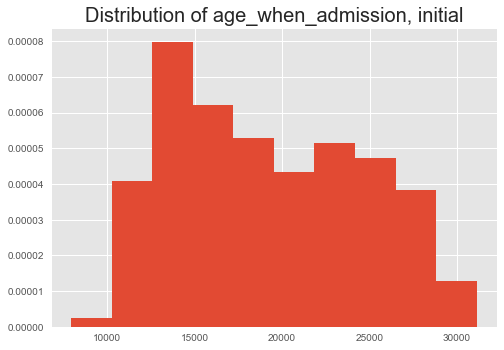

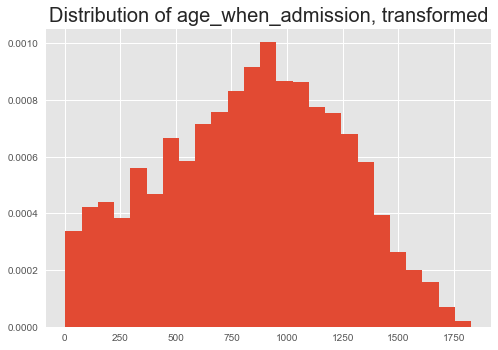

In [64]:
clinic_demo_bill['age_when_admission'].hist(bins = 10, normed = True)
plt.title('Distribution of age_when_admission, initial', fontsize = 20)
plt.show()

plt.title('Distribution of age_when_admission, transformed', fontsize = 20)
(abs(clinic_demo_bill['age_when_admission'] - clinic_demo_bill['age_when_admission'].mean())**0.8).hist(bins = 25, normed = True)

plt.show()

In [65]:
# transfrom age distribution by splitting it around 0

In [66]:
clinic_demo_bill['age_when_admission'] = clinic_demo_bill['age_when_admission'] - clinic_demo_bill['age_when_admission'].mean()

In [67]:
# let's look at the bill amounts over dates => we see that it looks stationary
# also we see peaks on July months

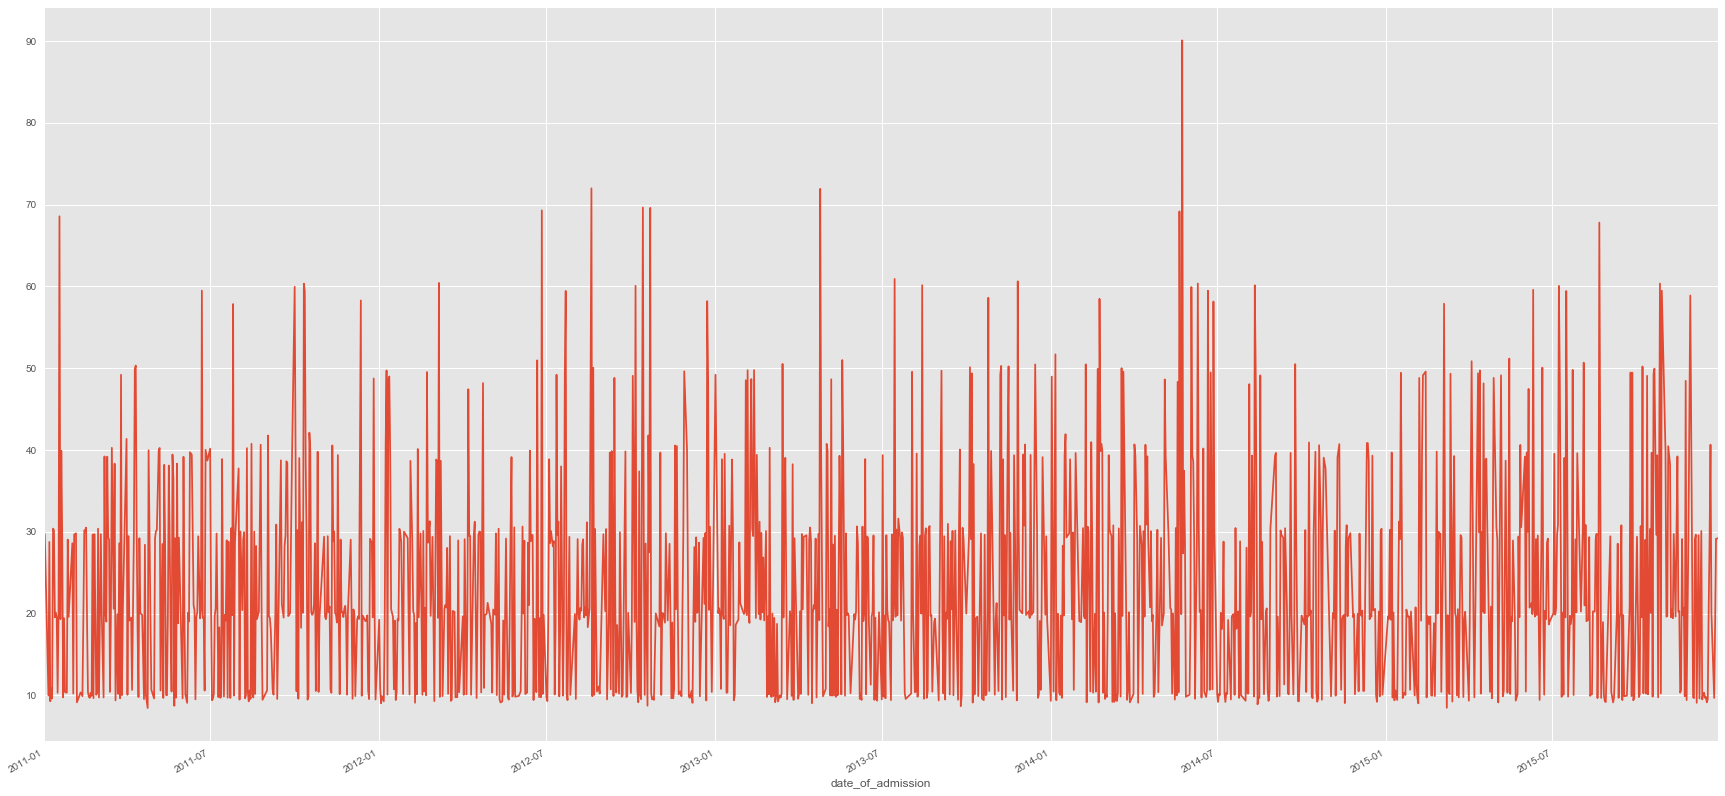

In [68]:
fig, ax = plt.subplots(figsize=(30,15))
clinic_demo_bill.groupby('date_of_admission')['amount'].sum().plot(x='date_of_admission', y='amount', ax = ax)
plt.show()

In [69]:
# on correlation heatmap we see correlation between amount and symptom_5, age, malay race, chinese race, medical_history_1,
# mass_index and weight. It seems logical

In [70]:
cols = [c for c in clinic_demo_bill.columns if c not in ['id', 'date_of_admission', 'date_of_birth',
                                                        'date_of_discharge'
                                                        ] and clinic_demo_bill[c].dtype != 'object']
data = [
    go.Heatmap(
        z= clinic_demo_bill[cols].corr().values,
        x=clinic_demo_bill[cols].columns.values,
        y=clinic_demo_bill[cols].columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

## Linear regression without feature engineering as a start

In [71]:
# as we dont see a trend in data but we see some seasonality, let's add month of admission as a feature

In [72]:
clinic_demo_bill['month'] = clinic_demo_bill['date_of_admission'].map(lambda x: x.month)

In [73]:
for c in np.sort(clinic_demo_bill['month'].unique()):
    clinic_demo_bill['month_' + str(c)] = (clinic_demo_bill['month'] == c)*1
clinic_demo_bill.drop(['month'], axis = 1, inplace = True)

In [74]:
cols = [ 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height',
       'stay_time', 'mass_index', 'gender', 'indian', 'chinese',
       'malay', 'singaporean', 'pr',
       'age_when_admission', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11']

In [75]:
X = clinic_demo_bill[cols]
y = clinic_demo_bill['amount']

import statsmodels.api as sm
from statsmodels.api import add_constant

model = sm.OLS(y,add_constant(X))

results = model.fit()

In [76]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2931.
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        12:56:55   Log-Likelihood:                 4124.1
No. Observations:                3400   AIC:                            -8160.
Df Residuals:                    3356   BIC:                            -7890.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.0327      0.231     39.138      0.000       8.580       9.485
medical_history_1      0.2755      0.003     82.685      0.000       0.269       0.282
medical_history_2      0.0183      0.003      6.648      0.000       0.013       0.024
medical_history_3      0.0313      0.004      8.582      0.000       0.024       0.038
medical_history_4      0.0086      0.006      1.522      0.128      -0.002       0.020
medical_history_5      0.0593      0.005     11.130      0.000       0.049       0.070
medical_history_6      0.1703      0.003     59.427      0.000       0.165       0.176
medical_history_7      0.0437      0.003     15.222      0.000       0.038       0.049
preop_medication_1     0.0206      0.003      8.232      0.000       0.016       0.026
preop_medication_2     0.0153      0.003      6.006      0.000       0.010       0.020
preop_medication_3     0.0277      0.003      8.508      0.000       0.021       0.034
preop_medication_4     0.0016      0.003      0.657      0.511      -0.003       0.007
preop_medication_5     0.0169      0.003      5.186      0.000       0.010       0.023
preop_medication_6     0.0238      0.003      8.318      0.000       0.018       0.029
symptom_1              0.1359      0.003     52.875      0.000       0.131       0.141
symptom_2              0.1864      0.003     70.485      0.000       0.181       0.192
symptom_3              0.2013      0.003     80.131      0.000       0.196       0.206
symptom_4              0.1736      0.003     61.906      0.000       0.168       0.179
symptom_5              0.5094      0.003    203.625      0.000       0.504       0.514
lab_result_1       -3.807e-05      0.001     -0.053      0.958      -0.001       0.001
lab_result_2           0.0002      0.001      0.487      0.626      -0.001       0.001
lab_result_3           0.0001   8.19e-05      1.430      0.153   -4.35e-05       0.000
weight                 0.0023      0.003      0.811      0.418      -0.003       0.008
height                 0.0004      0.001      0.284      0.776      -0.002       0.003
stay_time             -0.0008      0.000     -1.867      0.062      -0.002    4.12e-05
mass_index             0.6676      0.473      1.413      0.158      -0.259       1.594
gender                -0.0042      0.004     -1.133      0.257      -0.011       0.003
indian                 0.0930      0.007     13.936      0.000       0.080       0.106
chinese               -0.1007      0.006    -17.913      0.000      -0.112      -0.090
malay                  0.3426      0.006     56.698      0.000       0.331       0.354
singaporean           -0.6924      0.006   -116.923      0.000      -0.704      -0.681
pr                    -0.5091      0.007    -77.190      0.000      -0.522      -0.496
age_when_admission  2.677e-05   2.33e-

In [77]:
# check how our model fits along age values

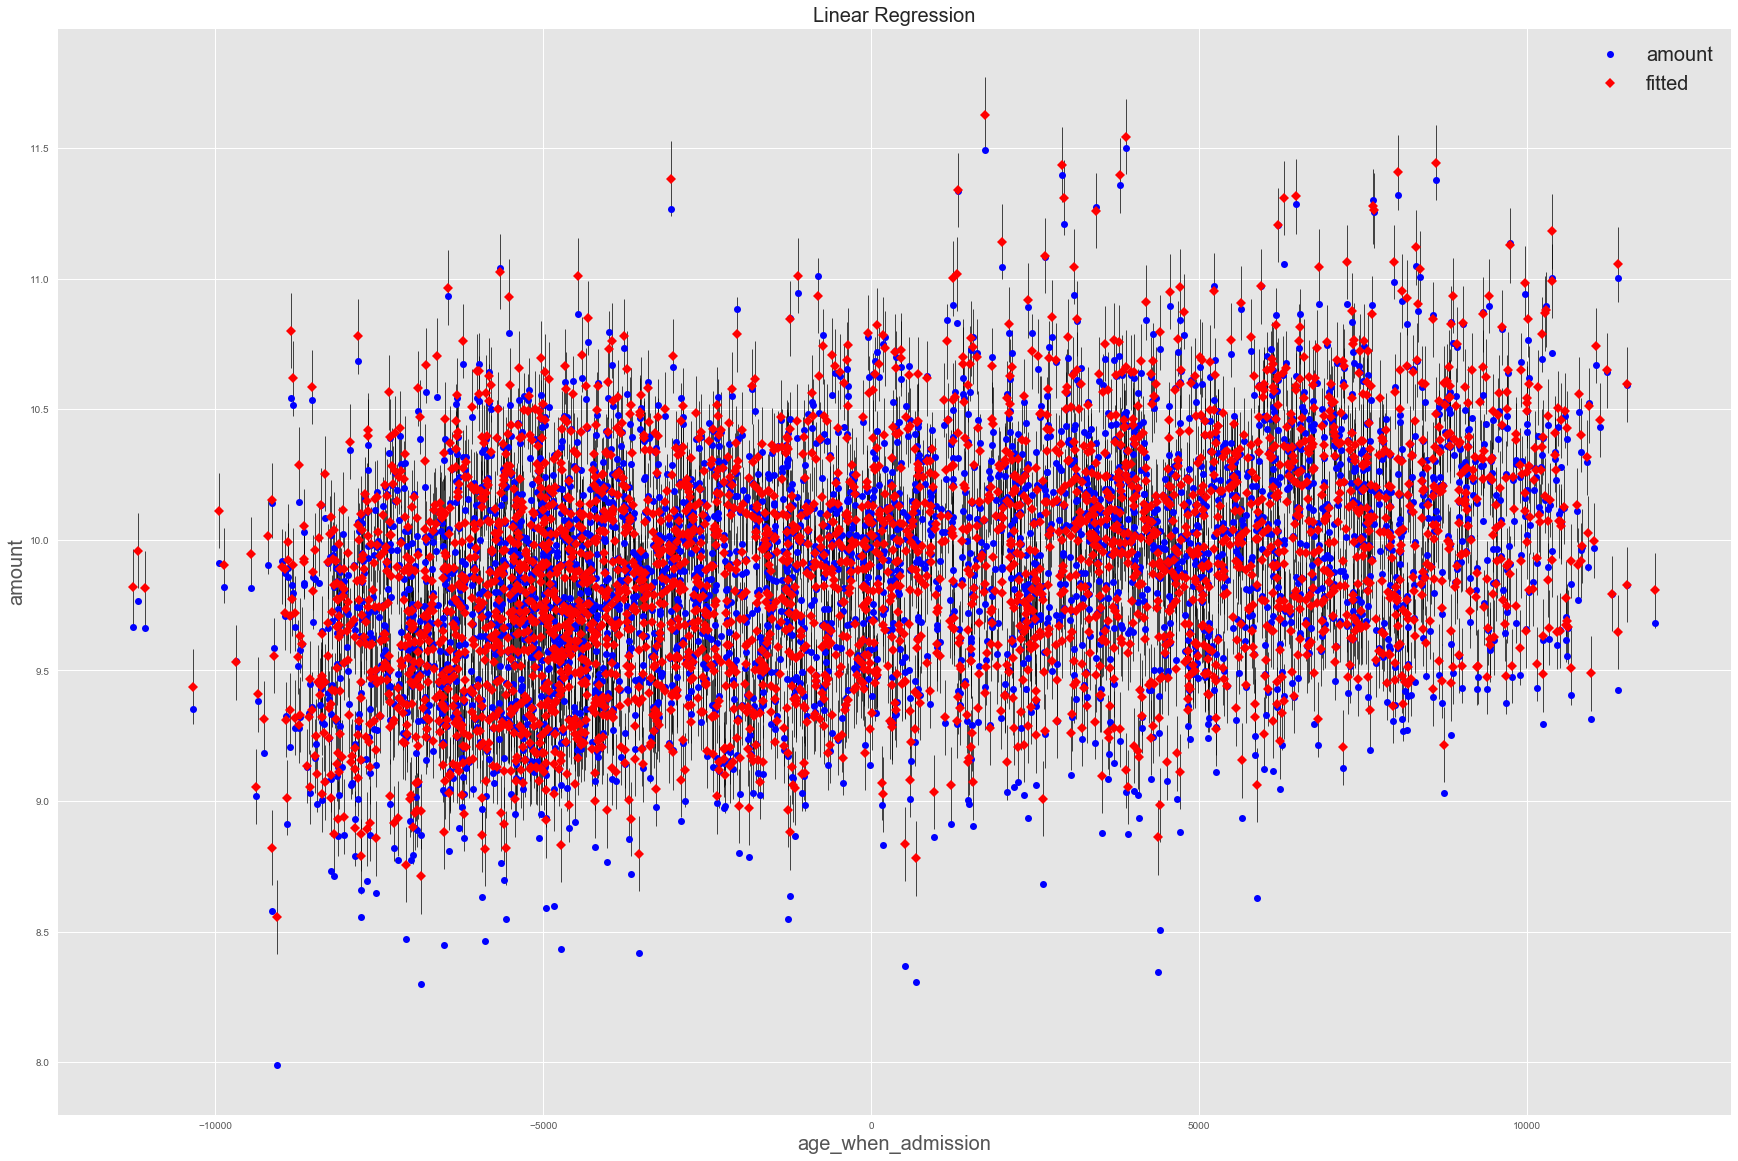

In [78]:
fig, ax = plt.subplots(figsize=(30,20))
fig = sm.graphics.plot_fit(results, 'age_when_admission', ax=ax)
ax.set_ylabel("amount", fontsize = 20)
ax.set_xlabel("age_when_admission", fontsize = 20)
ax.set_title("Linear Regression", fontsize = 20)
ax.legend(fontsize = 20)
plt.show()

In [79]:
# For a quick check of all the regressors, we use plot_partregress_grid
# besides p_values of coefficients, we see visually that not all of regressors  are useful for our model

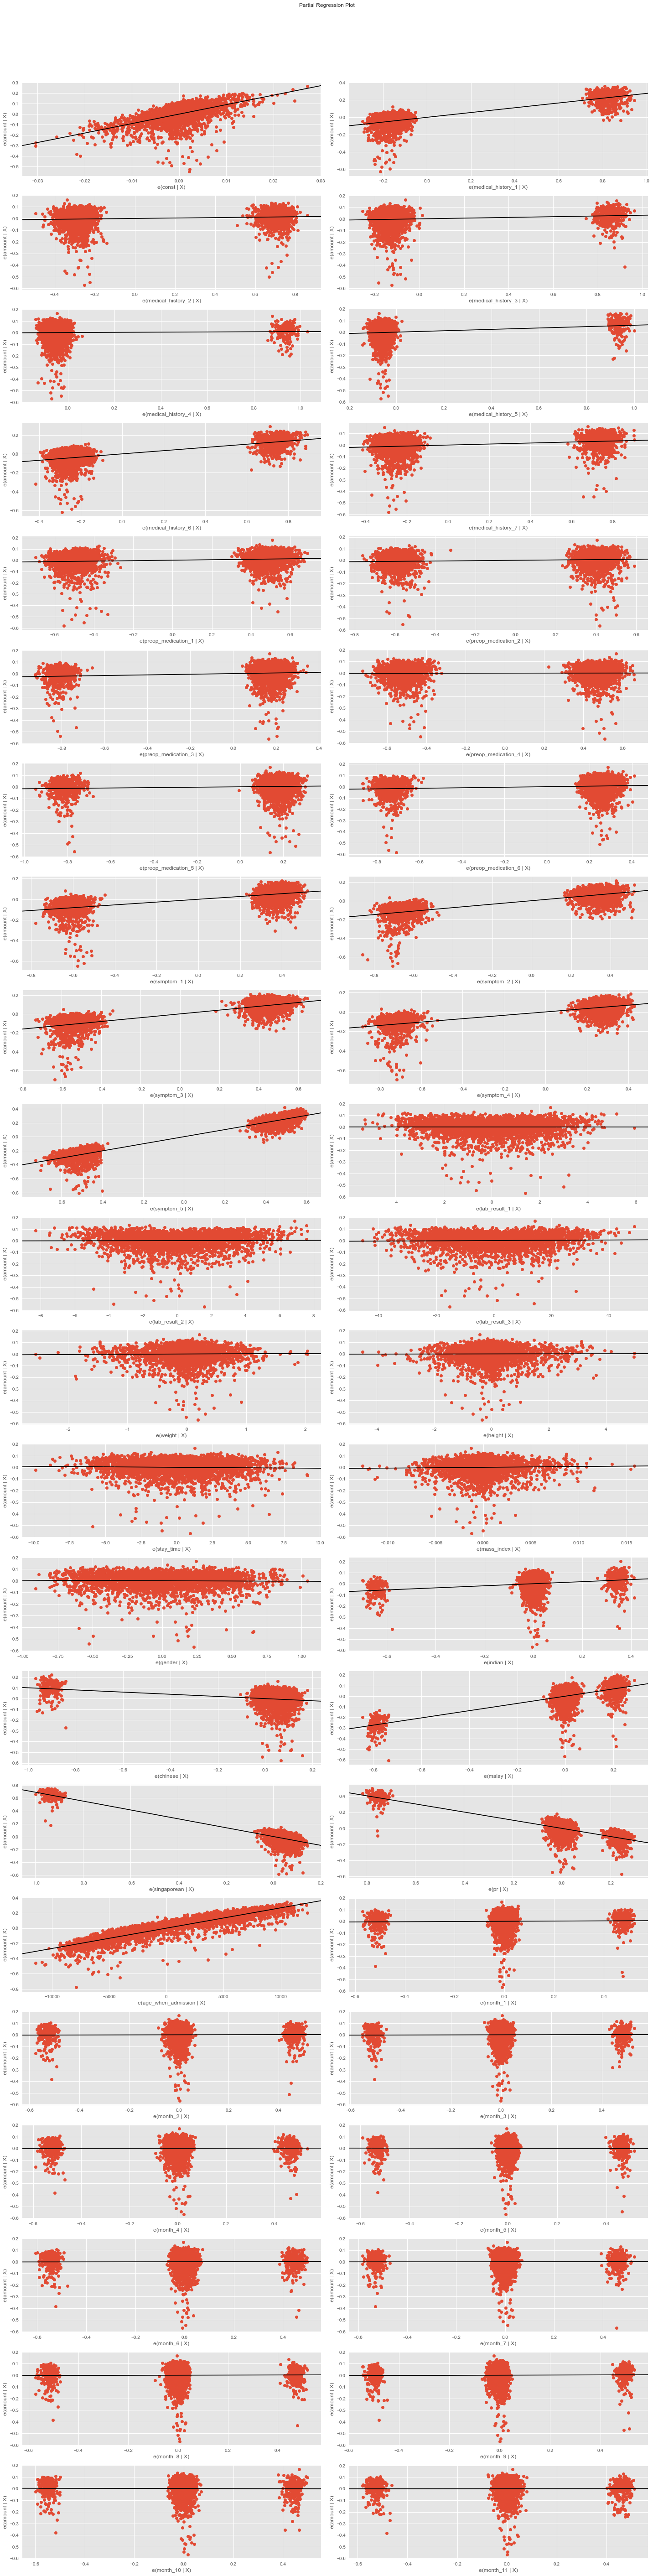

In [80]:
fig = plt.figure(figsize=(20,80))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
plt.show()

In [81]:
# With residuals plot we can see that our model understates costs and has some too extreme predictions

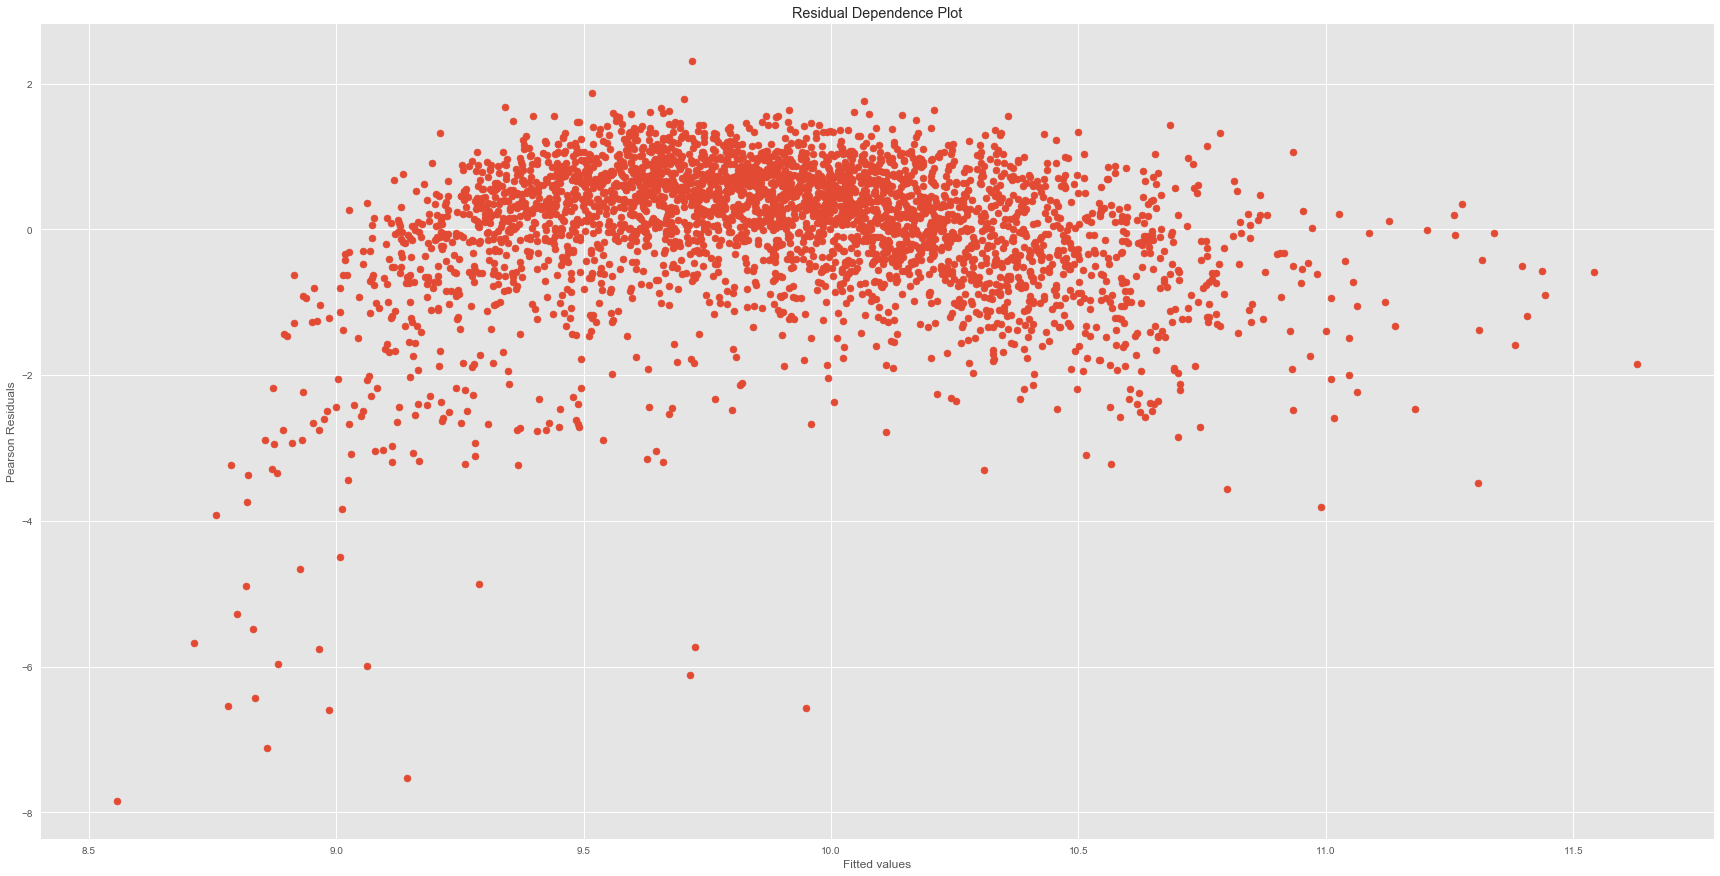

In [82]:
predictions = results.predict()
median = clinic_demo_bill['amount'].median()

fig, ax = plt.subplots(figsize=(30,15))

ax.scatter([p if p > 0 else median for p in predictions ], results.resid_pearson)
# ax.hlines(0, 0, 1)
# ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()

In [83]:
# check for MAPE values

In [84]:
def mape(y_true, y_pred): #mean_absolute_percentage_error
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [85]:
predictions = results.predict()

median = clinic_demo_bill['amount'].median()
clinic_demo_bill['amount_predicted'] = [p if p > 0 else median for p in predictions ]


In [86]:
# It looks pretty good

In [87]:
mape(clinic_demo_bill['amount'], clinic_demo_bill['amount_predicted'])

0.005287956536581735

In [88]:
# Mape after back log transformation

In [89]:
mape(np.exp(clinic_demo_bill['amount']), np.exp(clinic_demo_bill['amount_predicted']))

0.05285107880949196

In [90]:
# plot fitted predictions. They look pretty good. We see quite stable residuals

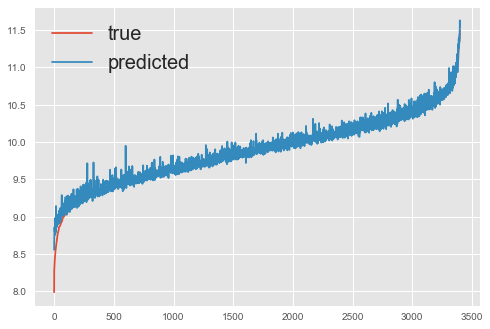

In [91]:
plt.plot(clinic_demo_bill.index, clinic_demo_bill.sort_values(by = 'amount')['amount'])
plt.plot(clinic_demo_bill.index, clinic_demo_bill.sort_values(by = 'amount')['amount_predicted'])

plt.legend(['true', 'predicted'], loc='upper left', fontsize = 20)
plt.show()

In [92]:
# Distribution of residuals looks like normal. That is really good

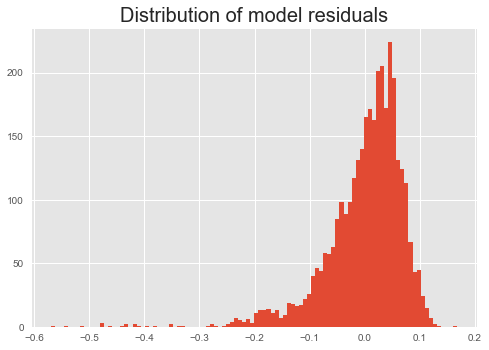

In [93]:
pd.Series(results.resid).hist(bins = 100)
plt.title("Distribution of model residuals", fontsize = 20)
plt.show()

In [94]:
# try to exclude otliers

In [95]:
std = clinic_demo_bill['amount'].std()
mean = clinic_demo_bill['amount'].mean()

X = clinic_demo_bill[abs(clinic_demo_bill['amount'] - mean) <= 3*std][cols]
y = clinic_demo_bill[abs(clinic_demo_bill['amount'] - mean) <= 3*std]['amount']

model = sm.OLS(y,add_constant(X))

results = model.fit()

In [96]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     3130.
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        12:57:04   Log-Likelihood:                 4343.7
No. Observations:                3375   AIC:                            -8599.
Df Residuals:                    3331   BIC:                            -8330.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.2158      0.215     42.841      0.000       8.794       9.638
medical_history_1      0.2739      0.003     88.070      0.000       0.268       0.280
medical_history_2      0.0192      0.003      7.500      0.000       0.014       0.024
medical_history_3      0.0296      0.003      8.739      0.000       0.023       0.036
medical_history_4      0.0064      0.005      1.225      0.221      -0.004       0.017
medical_history_5      0.0596      0.005     11.992      0.000       0.050       0.069
medical_history_6      0.1679      0.003     62.903      0.000       0.163       0.173
medical_history_7      0.0451      0.003     16.835      0.000       0.040       0.050
preop_medication_1     0.0193      0.002      8.270      0.000       0.015       0.024
preop_medication_2     0.0158      0.002      6.664      0.000       0.011       0.020
preop_medication_3     0.0254      0.003      8.350      0.000       0.019       0.031
preop_medication_4     0.0012      0.002      0.498      0.619      -0.003       0.006
preop_medication_5     0.0167      0.003      5.520      0.000       0.011       0.023
preop_medication_6     0.0236      0.003      8.834      0.000       0.018       0.029
symptom_1              0.1324      0.002     55.216      0.000       0.128       0.137
symptom_2              0.1813      0.002     73.370      0.000       0.176       0.186
symptom_3              0.1976      0.002     84.308      0.000       0.193       0.202
symptom_4              0.1677      0.003     63.965      0.000       0.163       0.173
symptom_5              0.5063      0.002    217.204      0.000       0.502       0.511
lab_result_1           0.0004      0.001      0.607      0.544      -0.001       0.002
lab_result_2           0.0003      0.000      0.636      0.525      -0.001       0.001
lab_result_3        6.702e-05   7.63e-05      0.879      0.380   -8.25e-05       0.000
weight                 0.0043      0.003      1.603      0.109      -0.001       0.010
height                -0.0005      0.001     -0.415      0.678      -0.003       0.002
stay_time             -0.0010      0.000     -2.485      0.013      -0.002      -0.000
mass_index             0.3230      0.441      0.733      0.464      -0.541       1.187
gender                -0.0032      0.003     -0.943      0.346      -0.010       0.004
indian                 0.0934      0.006     15.038      0.000       0.081       0.106
chinese               -0.0999      0.005    -19.086      0.000      -0.110      -0.090
malay                  0.3418      0.006     60.675      0.000       0.331       0.353
singaporean           -0.6935      0.006   -121.342      0.000      -0.705      -0.682
pr                    -0.5121      0.006    -81.041      0.000      -0.525      -0.500
age_when_admission  2.662e-05   2.17e-

In [97]:
# After excluding outliers we see that our residuals plot looks better and MAPE decreased

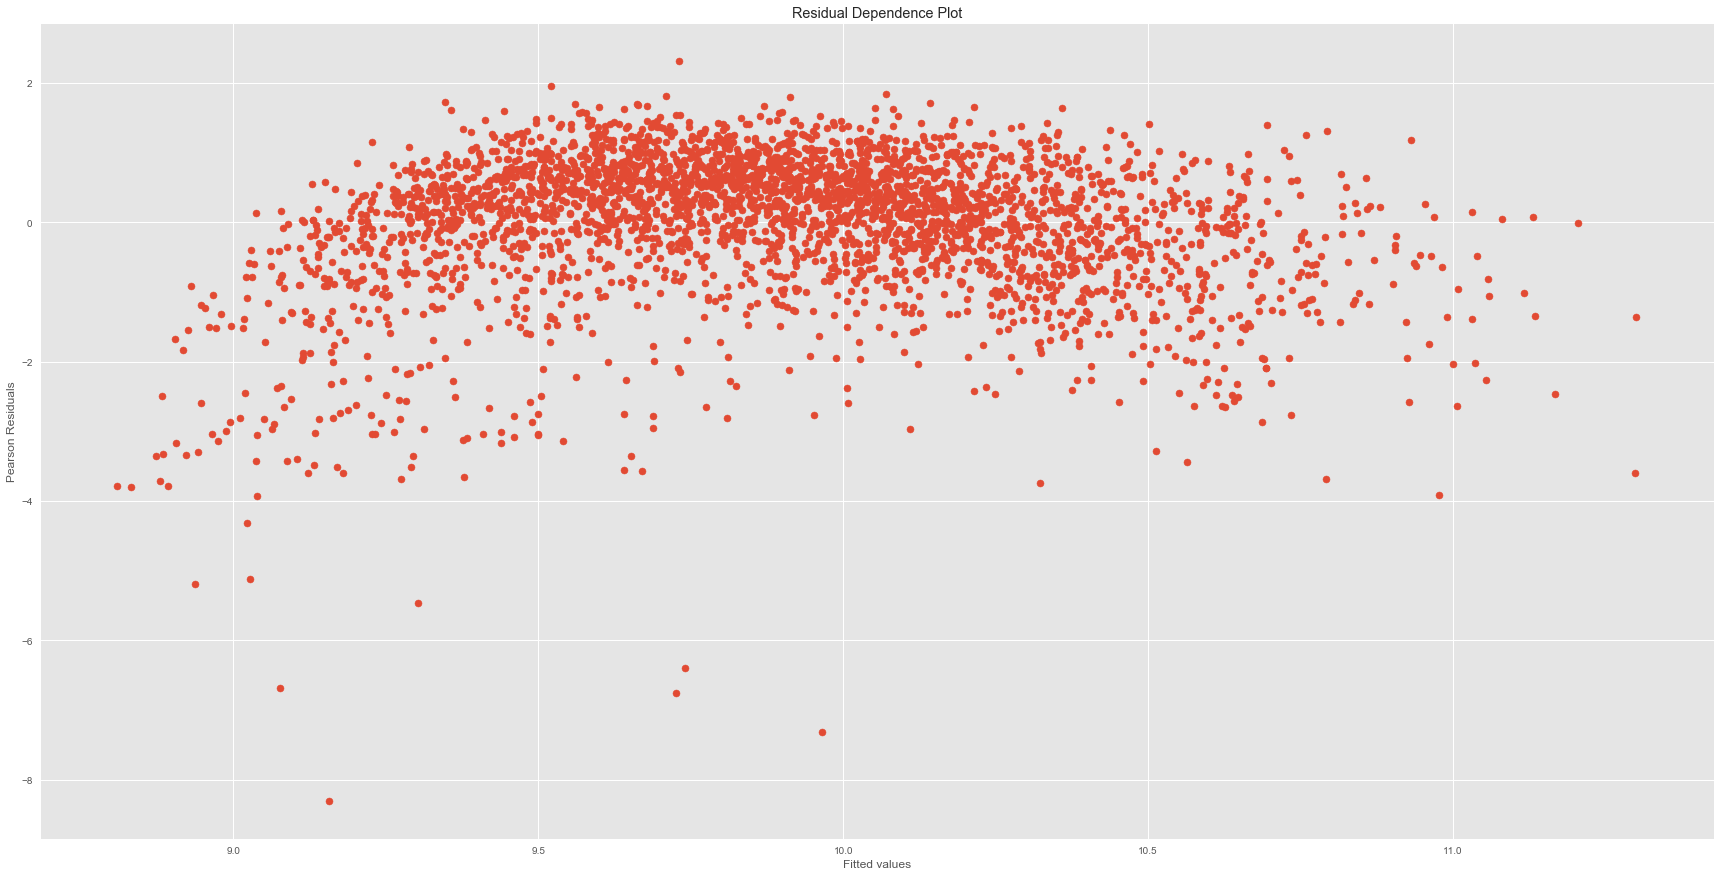

In [98]:
predictions = results.predict()
median = np.median(y)

fig, ax = plt.subplots(figsize=(30,15))

ax.scatter([p if p > 0 else median for p in predictions ], results.resid_pearson)
# ax.hlines(0, 0, 1)
# ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()

In [99]:
mape(np.exp(y), np.exp([p if p > 0 else median for p in predictions ]))

0.05012499943904329

In [100]:
X = clinic_demo_bill[abs(clinic_demo_bill['amount'] - mean) <= 3*std][cols].values
y = clinic_demo_bill[abs(clinic_demo_bill['amount'] - mean) <= 3*std]['amount'].values

In [101]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

seeds = [10, 500, 1000] # устредним так же по разбиению выборки
scores = []
kfold = 10
rqs = []
mapes = []

X = add_constant(X)

for seed in seeds:
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=False)
    
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(' xgb kfold: {}  of  {} : '.format(i+1, kfold))
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        model = sm.OLS(y_train, X_train)
        result = model.fit()
        predictions = result.predict(X_valid)
        median =np.median(X_train)
        predictions = [p if p > 0 else median for p in predictions ]
        
        r2 = r2_score(np.exp(y_valid), np.exp(predictions))
        mapev = mape(np.exp(y_valid), np.exp(predictions))
        rqs.append(r2)
        mapes.append(mapev)
        
        print('R2 after back transformation:', r2, 'MAPE  after back transformation:', mapev)

    print('Seed %s completed' % seed)

print('R squared mean  after back transformation value among folds and seeds %s with standard deviation %s' % (np.mean(rqs), np.std(rqs)))
print('MAPE mean value  after back transformation among folds and seeds %s with standard deviation %s' % (np.mean(mapes), np.std(mapes)))

 xgb kfold: 1  of  10 : 
R2 after back transformation: 0.981879388695 MAPE  after back transformation: 0.0492386246352
 xgb kfold: 2  of  10 : 
R2 after back transformation: 0.97698499038 MAPE  after back transformation: 0.0500179087817
 xgb kfold: 3  of  10 : 
R2 after back transformation: 0.97517046218 MAPE  after back transformation: 0.0548060102862
 xgb kfold: 4  of  10 : 
R2 after back transformation: 0.967978294037 MAPE  after back transformation: 0.0518657073478
 xgb kfold: 5  of  10 : 
R2 after back transformation: 0.965049496523 MAPE  after back transformation: 0.0498897744459
 xgb kfold: 6  of  10 : 
R2 after back transformation: 0.969133057712 MAPE  after back transformation: 0.0550026611185
 xgb kfold: 7  of  10 : 
R2 after back transformation: 0.97462694551 MAPE  after back transformation: 0.0479032473714
 xgb kfold: 8  of  10 : 
R2 after back transformation: 0.970163058854 MAPE  after back transformation: 0.050953772803
 xgb kfold: 9  of  10 : 
R2 after back transformatio

# Keep initial dataset without outliers to get more robust model

In [102]:
std = clinic_demo_bill['amount'].std()
mean = clinic_demo_bill['amount'].mean()

clinic_demo_bill = clinic_demo_bill[abs(clinic_demo_bill['amount'] - mean) <= 3*std]

## Exclude nonsignificant features

In [103]:
# eliminate features with low p_values

In [104]:
cols_stay = []
for k, v  in results.pvalues.items():
    if v <= 0.5 and k != 'const':
        cols_stay.append(k)

In [105]:
cols_stay

['medical_history_1',
 'medical_history_2',
 'medical_history_3',
 'medical_history_4',
 'medical_history_5',
 'medical_history_6',
 'medical_history_7',
 'preop_medication_1',
 'preop_medication_2',
 'preop_medication_3',
 'preop_medication_5',
 'preop_medication_6',
 'symptom_1',
 'symptom_2',
 'symptom_3',
 'symptom_4',
 'symptom_5',
 'lab_result_3',
 'weight',
 'stay_time',
 'mass_index',
 'gender',
 'indian',
 'chinese',
 'malay',
 'singaporean',
 'pr',
 'age_when_admission',
 'month_1',
 'month_9',
 'month_10']

In [106]:
X = clinic_demo_bill[cols_stay]
y = clinic_demo_bill['amount']

In [107]:
import statsmodels.api as sm

In [108]:
model = sm.OLS(y,add_constant(X))

In [109]:
results = model.fit()

In [110]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4352.
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        12:57:05   Log-Likelihood:                 4341.9
No. Observations:                3375   AIC:                            -8620.
Df Residuals:                    3343   BIC:                            -8424.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.1428      0.016    564.679      0.000       9.111       9.175
medical_history_1      0.2740      0.003     88.367      0.000       0.268       0.280
medical_history_2      0.0193      0.003      7.557      0.000       0.014       0.024
medical_history_3      0.0295      0.003      8.733      0.000       0.023       0.036
medical_history_4      0.0067      0.005      1.277      0.202      -0.004       0.017
medical_history_5      0.0598      0.005     12.055      0.000       0.050       0.070
medical_history_6      0.1680      0.003     63.054      0.000       0.163       0.173
medical_history_7      0.0451      0.003     16.914      0.000       0.040       0.050
preop_medication_1     0.0193      0.002      8.318      0.000       0.015       0.024
preop_medication_2     0.0157      0.002      6.667      0.000       0.011       0.020
preop_medication_3     0.0255      0.003      8.385      0.000       0.020       0.031
preop_medication_5     0.0168      0.003      5.542      0.000       0.011       0.023
preop_medication_6     0.0236      0.003      8.880      0.000       0.018       0.029
symptom_1              0.1323      0.002     55.321      0.000       0.128       0.137
symptom_2              0.1812      0.002     73.595      0.000       0.176       0.186
symptom_3              0.1976      0.002     84.541      0.000       0.193       0.202
symptom_4              0.1678      0.003     64.267      0.000       0.163       0.173
symptom_5              0.5063      0.002    217.819      0.000       0.502       0.511
lab_result_3        6.629e-05    7.6e-05      0.872      0.383   -8.28e-05       0.000
weight                 0.0032      0.001      6.418      0.000       0.002       0.004
stay_time             -0.0010      0.000     -2.521      0.012      -0.002      -0.000
mass_index             0.5005      0.080      6.241      0.000       0.343       0.658
gender                -0.0029      0.003     -0.849      0.396      -0.010       0.004
indian                 0.0934      0.006     15.081      0.000       0.081       0.106
chinese               -0.1001      0.005    -19.197      0.000      -0.110      -0.090
malay                  0.3417      0.006     60.824      0.000       0.331       0.353
singaporean           -0.6935      0.006   -121.786      0.000      -0.705      -0.682
pr                    -0.5122      0.006    -81.416      0.000      -0.525      -0.500
age_when_admission  2.662e-05   2.16e-07    122.998      0.000    2.62e-05     2.7e-05
month_1                0.0073      0.004      1.701      0.089      -0.001       0.016
month_9                0.0067      0.004      1.505      0.133      -0.002       0.015
month_10              -0.0053      0.004     -1.312      0.190      -0.013       0.003
======================================

## After excluding features with low significance we decreased AIC level and slightly improved MAPE

In [111]:
predictions = results.predict()

median = clinic_demo_bill['amount'].median()
clinic_demo_bill['amount_predicted'] = [p if p > 0 else median for p in predictions ]

In [112]:
mape(clinic_demo_bill['amount'], clinic_demo_bill['amount_predicted'])

0.0050204945628613586

In [113]:
# MAPE after back log transformation

In [114]:
mape(np.exp(clinic_demo_bill['amount']), np.exp(clinic_demo_bill['amount_predicted']))

0.050119603549271925

In [115]:
# plot predictions. THey look pretty good

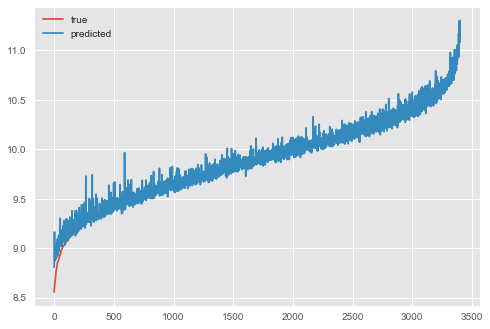

In [116]:
plt.plot(clinic_demo_bill.index, clinic_demo_bill.sort_values(by = 'amount')['amount'])
plt.plot(clinic_demo_bill.index, clinic_demo_bill.sort_values(by = 'amount')['amount_predicted'])

plt.legend(['true', 'predicted'], loc='upper left')
plt.show()

In [117]:
X = clinic_demo_bill[cols_stay].values
y = clinic_demo_bill['amount'].values

seeds = [10, 500, 1000] # устредним так же по разбиению выборки
scores = []
kfold = 10
rqs = []
mapes = []

X = add_constant(X)

for seed in seeds:
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=False)
    
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(' xgb kfold: {}  of  {} : '.format(i+1, kfold))
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        model = sm.OLS(y_train, X_train)
        result = model.fit()
        predictions = result.predict(X_valid)
        median =np.median(X_train)
        predictions = [p if p > 0 else median for p in predictions ]
        
        r2 = r2_score(np.exp(y_valid), np.exp(predictions))
        mapev = mape(np.exp(y_valid), np.exp(predictions))
        rqs.append(r2)
        mapes.append(mapev)
        
        print('R2 after back transformation:', r2, 'MAPE  after back transformation:', mapev)

    print('Seed %s completed' % seed)

print('R squared mean  after back transformation value among folds and seeds %s with standard deviation %s' % (np.mean(rqs), np.std(rqs)))
print('MAPE mean value  after back transformation among folds and seeds %s with standard deviation %s' % (np.mean(mapes), np.std(mapes)))

 xgb kfold: 1  of  10 : 
R2 after back transformation: 0.982138861865 MAPE  after back transformation: 0.048979624786
 xgb kfold: 2  of  10 : 
R2 after back transformation: 0.977069963009 MAPE  after back transformation: 0.0499038055562
 xgb kfold: 3  of  10 : 
R2 after back transformation: 0.975534292955 MAPE  after back transformation: 0.0543531141651
 xgb kfold: 4  of  10 : 
R2 after back transformation: 0.968235570529 MAPE  after back transformation: 0.0517026158188
 xgb kfold: 5  of  10 : 
R2 after back transformation: 0.965228889907 MAPE  after back transformation: 0.0498772730939
 xgb kfold: 6  of  10 : 
R2 after back transformation: 0.969020633682 MAPE  after back transformation: 0.0550338469099
 xgb kfold: 7  of  10 : 
R2 after back transformation: 0.974707166413 MAPE  after back transformation: 0.0479701986713
 xgb kfold: 8  of  10 : 
R2 after back transformation: 0.970213900199 MAPE  after back transformation: 0.0507159185802
 xgb kfold: 9  of  10 : 
R2 after back transforma

## Check model stability with cross validation

In [118]:
# let's check model quality with KFold cross-validation among different seeds

In [119]:
X = clinic_demo_bill[cols_stay].values
y = clinic_demo_bill['amount'].values

In [120]:
seeds = [10, 500, 1000] # устредним так же по разбиению выборки
scores = []
kfold = 10
rqs = []
mapes = []

X = add_constant(X)

for seed in seeds:
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=False)
    
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(' xgb kfold: {}  of  {} : '.format(i+1, kfold))
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        model = sm.OLS(y_train, X_train)
        result = model.fit()
        predictions = result.predict(X_valid)
        median =np.median(X_train)
        predictions = [p if p > 0 else median for p in predictions ]
        
        r2 = r2_score(np.exp(y_valid), np.exp(predictions))
        mapev = mape(np.exp(y_valid), np.exp(predictions))
        rqs.append(r2)
        mapes.append(mapev)
        
        print('R2 after back transformation:', r2, 'MAPE  after back transformation:', mapev)

    print('Seed %s completed' % seed)

 xgb kfold: 1  of  10 : 
R2 after back transformation: 0.982138861865 MAPE  after back transformation: 0.048979624786
 xgb kfold: 2  of  10 : 
R2 after back transformation: 0.977069963009 MAPE  after back transformation: 0.0499038055562
 xgb kfold: 3  of  10 : 
R2 after back transformation: 0.975534292955 MAPE  after back transformation: 0.0543531141651
 xgb kfold: 4  of  10 : 
R2 after back transformation: 0.968235570529 MAPE  after back transformation: 0.0517026158188
 xgb kfold: 5  of  10 : 
R2 after back transformation: 0.965228889907 MAPE  after back transformation: 0.0498772730939
 xgb kfold: 6  of  10 : 
R2 after back transformation: 0.969020633682 MAPE  after back transformation: 0.0550338469099
 xgb kfold: 7  of  10 : 
R2 after back transformation: 0.974707166413 MAPE  after back transformation: 0.0479701986713
 xgb kfold: 8  of  10 : 
R2 after back transformation: 0.970213900199 MAPE  after back transformation: 0.0507159185802
 xgb kfold: 9  of  10 : 
R2 after back transforma

In [121]:
print('R squared mean  after back transformation value among folds and seeds %s with standard deviation %s' % (np.mean(rqs), np.std(rqs)))

R squared mean  after back transformation value among folds and seeds 0.973206735135 with standard deviation 0.00472618539694


In [122]:
print('MAPE mean value  after back transformation among folds and seeds %s with standard deviation %s' % (np.mean(mapes), np.std(mapes)))

MAPE mean value  after back transformation among folds and seeds 0.0506306161647 with standard deviation 0.00239203321674


## Now it is time for little feature engineering

In [123]:
# let's add feature interactions

In [124]:
cols_interact = ['medical_history_1', 'medical_history_2', 'medical_history_3', 'medical_history_4',
          'medical_history_5', 'medical_history_6', 'medical_history_7', 'preop_medication_1',
          'preop_medication_2', 'preop_medication_3', 'preop_medication_5']
cols_stay_add = [c for c in cols_stay]

import itertools

combinations = [[c[0], c[1]] for c in sorted(set(itertools.combinations(cols_interact,2)))]
for c in combinations:
    clinic_demo_bill[c[0] + '_' + c[1]] = clinic_demo_bill[c[0]]*clinic_demo_bill[c[1]]
    print([c[0], c[1]])
    cols_stay_add.append(c[0] + '_' + c[1])

['medical_history_1', 'medical_history_2']
['medical_history_1', 'medical_history_3']
['medical_history_1', 'medical_history_4']
['medical_history_1', 'medical_history_5']
['medical_history_1', 'medical_history_6']
['medical_history_1', 'medical_history_7']
['medical_history_1', 'preop_medication_1']
['medical_history_1', 'preop_medication_2']
['medical_history_1', 'preop_medication_3']
['medical_history_1', 'preop_medication_5']
['medical_history_2', 'medical_history_3']
['medical_history_2', 'medical_history_4']
['medical_history_2', 'medical_history_5']
['medical_history_2', 'medical_history_6']
['medical_history_2', 'medical_history_7']
['medical_history_2', 'preop_medication_1']
['medical_history_2', 'preop_medication_2']
['medical_history_2', 'preop_medication_3']
['medical_history_2', 'preop_medication_5']
['medical_history_3', 'medical_history_4']
['medical_history_3', 'medical_history_5']
['medical_history_3', 'medical_history_6']
['medical_history_3', 'medical_history_7']
['m

In [125]:
X = clinic_demo_bill[cols_stay_add]
X = add_constant(X)
y = clinic_demo_bill['amount']

In [126]:
import statsmodels.api as sm

In [127]:
model = sm.OLS(y,X)

In [128]:
results_un = model.fit()

In [129]:
results_un.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1593.
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        12:57:06   Log-Likelihood:                 4394.8
No. Observations:                3375   AIC:                            -8616.
Df Residuals:                    3288   BIC:                            -8083.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     9.1369      0.019    490.776      0.000       9.100       9.173
medical_history_1                         0.3021      0.012     25.900      0.000       0.279       0.325
medical_history_2                         0.0366      0.009      3.886      0.000       0.018       0.055
medical_history_3                         0.0105      0.013      0.806      0.421      -0.015       0.036
medical_history_4                        -0.0232      0.021     -1.128      0.260      -0.064       0.017
medical_history_5                         0.1015      0.019      5.416      0.000       0.065       0.138
medical_history_6                         0.1882      0.010     18.995      0.000       0.169       0.208
medical_history_7                         0.0420      0.010      4.232      0.000       0.023       0.061
preop_medication_1                        0.0148      0.008      1.753      0.080      -0.002       0.031
preop_medication_2                        0.0219      0.008      2.588      0.010       0.005       0.039
preop_medication_3                        0.0210      0.009      2.283      0.022       0.003       0.039
preop_medication_5                        0.0165      0.009      1.795      0.073      -0.002       0.035
preop_medication_6                        0.0232      0.003      8.693      0.000       0.018       0.028
symptom_1                                 0.1321      0.002     55.119      0.000       0.127       0.137
symptom_2                                 0.1820      0.002     73.762      0.000       0.177       0.187
symptom_3                                 0.1976      0.002     84.693      0.000       0.193       0.202
symptom_4                                 0.1678      0.003     64.087      0.000       0.163       0.173
symptom_5                                 0.5065      0.002    217.701      0.000       0.502       0.511
lab_result_3                           6.712e-05    7.6e-05      0.883      0.377   -8.19e-05       0.000
weight                                    0.0032      0.001      6.345      0.000       0.002       0.004
stay_time                                -0.0010      0.000     -2.507      0.012      -0.002      -0.000
mass_index                                0.5074      0.080      6.320      0.000       0.350       0.665
gender                                   -0.0032      0.003     -0.947      0.344      -0.010       0.003
indian                                    0.0927      0.006     14.951      0.000       0.081       0.105
chinese                                  -0.1008      0.005    -19.302      0.000      -0.111      -0.091
malay                                     0.3413      0.006     60.701      0.000       0.330       0.352
singapore

In [130]:
for k, v  in results_un.pvalues.items():
    if v <= 0.01 and len(k) > 20:
        cols_stay.append(k)

In [131]:
# try model with these additional interaction features

In [132]:
X = clinic_demo_bill[cols_stay]
X = add_constant(X)

y = clinic_demo_bill['amount']

In [133]:
import statsmodels.api as sm

In [134]:
model = sm.OLS(y,X)

In [135]:
results_un = model.fit()

In [136]:
mape(np.exp(clinic_demo_bill['amount']), np.exp(results_un.predict()))

0.049968623249910867

In [137]:
results_un.rsquared_adj

0.97589112577902382

In [138]:
X = clinic_demo_bill[cols_stay].values
X = add_constant(X)

y = clinic_demo_bill['amount'].values

seeds = [10, 500, 1000] # устредним так же по разбиению выборки
scores = []
kfold = 10
rqs = []
mapes = []
for seed in seeds:
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=False)
    

    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(' xgb kfold: {}  of  {} : '.format(i+1, kfold))
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        model = sm.OLS(y_train, X_train)
        result = model.fit()
        predictions = result.predict(X_valid)
        median =np.median(X_train)
        predictions = [p if p > 0 else median for p in predictions ]
        
        r2 = r2_score(np.exp(y_valid), np.exp(predictions))
        mapev = mape(np.exp(y_valid), np.exp(predictions))
        rqs.append(r2)
        mapes.append(mapev)
        
        print('R2 after back transformation:', r2, 'MAPE  after back transformation:', mapev)

    print('Seed %s completed' % seed)

 xgb kfold: 1  of  10 : 
R2 after back transformation: 0.983019309335 MAPE  after back transformation: 0.0481735707756
 xgb kfold: 2  of  10 : 
R2 after back transformation: 0.976117307302 MAPE  after back transformation: 0.0496992650674
 xgb kfold: 3  of  10 : 
R2 after back transformation: 0.977830151647 MAPE  after back transformation: 0.0539367833774
 xgb kfold: 4  of  10 : 
R2 after back transformation: 0.967874891841 MAPE  after back transformation: 0.0514929176983
 xgb kfold: 5  of  10 : 
R2 after back transformation: 0.967233821624 MAPE  after back transformation: 0.0501467374785
 xgb kfold: 6  of  10 : 
R2 after back transformation: 0.969273182836 MAPE  after back transformation: 0.0553848139709
 xgb kfold: 7  of  10 : 
R2 after back transformation: 0.974184403106 MAPE  after back transformation: 0.0484818624192
 xgb kfold: 8  of  10 : 
R2 after back transformation: 0.972258676162 MAPE  after back transformation: 0.0503468901459
 xgb kfold: 9  of  10 : 
R2 after back transform

In [139]:
print('R squared mean  after back transformation value among folds and seeds %s with standard deviation %s' % (np.mean(rqs), np.std(rqs)))

R squared mean  after back transformation value among folds and seeds 0.973778067364 with standard deviation 0.00459142678459


In [140]:
print('MAPE mean value  after back transformation among folds and seeds %s with standard deviation %s' % (np.mean(mapes), np.std(mapes)))

MAPE mean value  after back transformation among folds and seeds 0.0504859957244 with standard deviation 0.0025184125785


## Prefoming the significance test of restricted and unrestricted models shows the significant difference between two models. Should keep the unrestricted option

In [141]:
results_un.compare_lm_test(restricted = results)

(41.986560733417498, 9.1902883042025703e-11, 1.0)

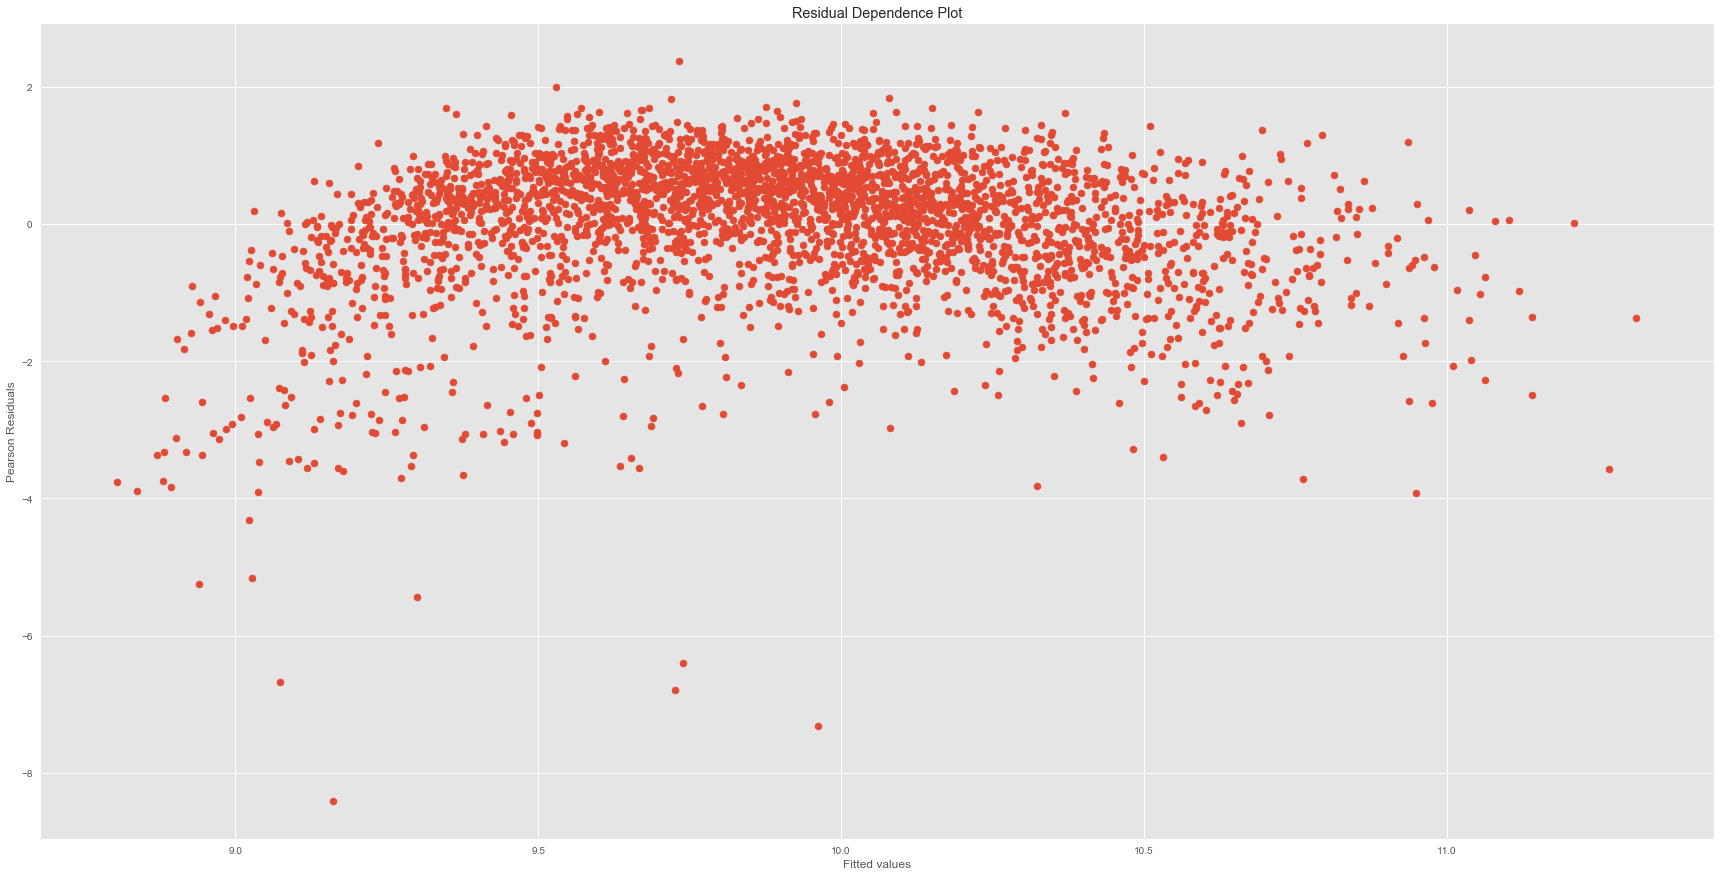

In [145]:
predictions = results_un.predict()
median = np.median(y)

fig, ax = plt.subplots(figsize=(30,15))

ax.scatter([p if p > 0 else median for p in predictions ], results.resid_pearson)
# ax.hlines(0, 0, 1)
# ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()

# These new interaction features and  elimination of unsignificant feature slightly improved accuracy up to 95 %

## Describe how drivers of costs of care look like

In [143]:
coef_dict = results_un.params.copy()
for k,v in coef_dict.items():
    if k == 'age_when_admission':
        coef_dict[k] = v*365

dicty = {}
for k, v in coef_dict.items():
    if 'medical' in k or 'preop' in k or 'symptom' in k or k in ['indian', 'malay', 'pr', 'chinese', 'singaporean'] \
    or 'month' in k or 'medical_history_1_medical_history_6' in k:
        if v > 0:
            dicty[k] = 'If %s is true, then cost of medication grows by %s percent' % (k, round((v*100),2))
        else:
            dicty[k] = 'If %s is true, then cost of medication decreases by %s percent' % (k, round((v*100),2))
    elif 'gender' in k:
        if v > 0:
            dicty[k] = 'If a patient is a man, then cost of medication grows by %s percent' % round((v*100),2)
        else:
            dicty[k] = 'If a patient is a man, then cost of medication decreases by %s percent' % round((v*100),2)
    elif k == 'const':
        dicty[k] = 'If all predictors are set to 0, then we expect cost of medication as %s' % round(np.exp(v),0)
    elif k == 'age_when_admission':
        dicty[k] = 'If the age of a patient is higher than average value among patients by 1 year, then we expect a growth, otherwise a decrease  by %s percent' % round((v*100),2)
    else: 
        if v > 0:
            dicty[k] = 'If %s increased by 1, then costs of medication grow by %s percent' % (k, round((v*100),4))
        else:
            dicty[k] = 'If %s increased by 1, then costs of medication decrease by %s percent' % (k, round((v*100),4))

result_frame = pd.DataFrame(results_un.params).reset_index()
result_frame.columns = ['predictor', 'coef_value']

result_frame['meaning'] = result_frame['predictor'].map(dicty)
result_frame['abs_coef_value'] = abs(result_frame['coef_value'])

pd.set_option('max_colwidth', 10000)

result_frame.sort_values(by = ['abs_coef_value'], ascending = False).drop('abs_coef_value', axis = 1)

,predictor,coef_value,meaning
0,const,9.142234,"If all predictors are set to 0, then we expect cost of medication as 9342.0"
26,singaporean,-0.693707,"If singaporean is true, then cost of medication decreases by -69.37 percent"
27,pr,-0.512194,"If pr is true, then cost of medication decreases by -51.22 percent"
17,symptom_5,0.506403,"If symptom_5 is true, then cost of medication grows by 50.64 percent"
21,mass_index,0.498141,"If mass_index increased by 1, then costs of medication grow by 49.8141 percent"
25,malay,0.340738,"If malay is true, then cost of medication grows by 34.07 percent"
1,medical_history_1,0.285592,"If medical_history_1 is true, then cost of medication grows by 28.56 percent"
15,symptom_3,0.197485,"If symptom_3 is true, then cost of medication grows by 19.75 percent"
14,symptom_2,0.181654,"If symptom_2 is true, then cost of medication grows by 18.17 percent"
6,medical_history_6,0.175578,"If medical_history_6 is true, then cost of medication grows by 17.56 percent"
